In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
!pip install pyccel
!pip install numba
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

     |████████████████████████████████| 245kB 5.9MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 5.9MB 25.4MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [ ]:
def solve_1d_nonlinearconv_pure(u,un, nt, nx, dt, dx):
  for n in range(nt):
    for j in range(nx):
      un[j]=u[j]
    for i in range(1,nx):
      u[i]=un[i]-un[i]*(dt/dx)*(un[i]-un[i-1])
  return 0

In [ ]:
@njit
def solve_1d_nonlinearconv_numba(u,un,  nt, nx, dt, dx):
  for n in range(nt):
    for j in range(nx):
      un[j]=u[j]
    for i in range(1,nx):
      u[i]=un[i]-un[i]*(dt/dx)*(un[i]-un[i-1])
  return 0

In [ ]:
@types('float[:]','float[:]','int','int','float','float','float')
def solve_1d_nonlinearconv_pyccel(u,un, nt, nx, dt, dx):
  for n in range(nt):
    for j in range(nx):
      un[j]=u[j]
    for i in range(1,nx):
      u[i]=un[i]-un[i]*(dt/dx)*(un[i]-un[i-1])
  return 0

Text(0.5, 1.0, '1D Linear Convection')

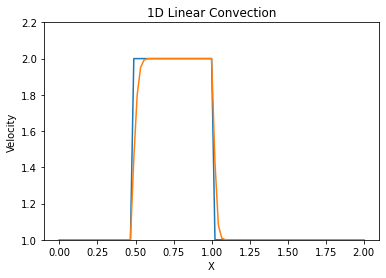

In [ ]:
nx = 91  
dx = 2 / (nx-1)
nt = 10    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

In [ ]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

1000 loops, best of 3: 1.13 ms per loop


In [ ]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)


The slowest run took 319721.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 1.3 µs per loop


In [ ]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

pyccel:
 |warning [semantic]: mod_2ku3dbw0.py| The number of arguments in the function solve_1d_nonlinearconv_pyccel (6) does not match the number of types in decorator/header (7). ((u, un, nt, nx, dt, dx))



In [ ]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

The slowest run took 6.69 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.53 µs per loop
